# Exercise 1

We first load a dataset and examine its dimensions.

In [10]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

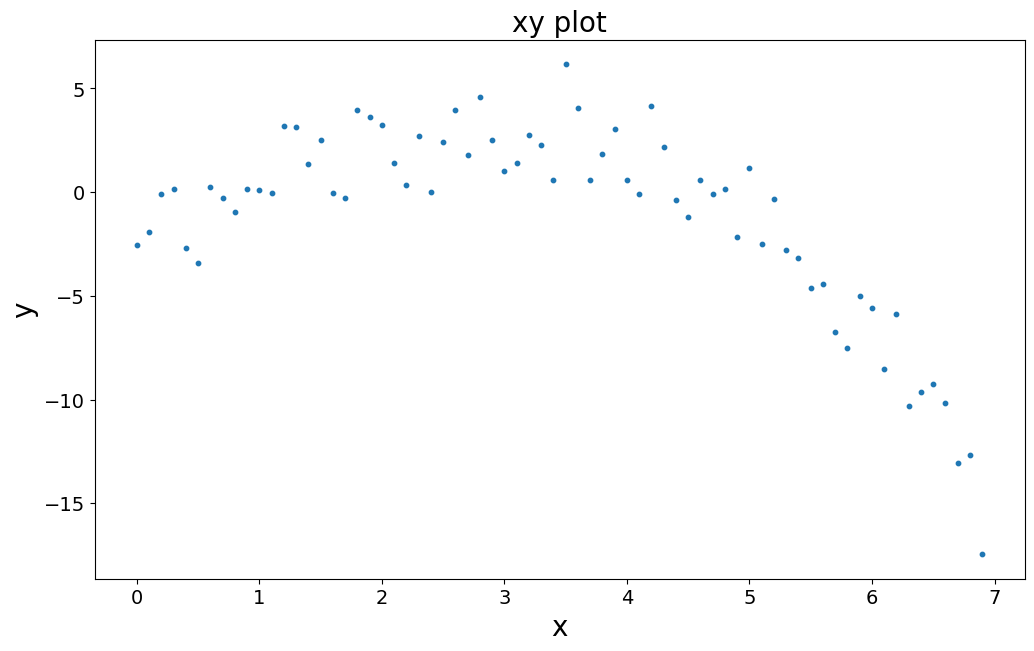

In [12]:
import matplotlib.pyplot as plt
# Your code for scatterplot here
x = xy_data[:,0]      # First column of array (indexed by 0)
y = xy_data[:,1]  # Second column of array (indexed by 1) 


# Set parameters to make sure figures are large enough. You can try changing these values
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.scatter(x, y, s=10)   # s can be used to adjust the size of the dots
plt.xlabel('x')
plt.ylabel('y')
plt.title('xy plot')
plt.savefig('xy_plot.pdf', bbox_inches = 'tight')
plt.show()


### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [13]:
def polyreg(data_matrix, k):
    x = data_matrix[:,0]     
    y = data_matrix[:,1] 
    A = np.ones(np.shape(y))
    if k == 0:
        beta_lin = np.mean(y)
        fit_lin = np.mean(y)*A
        resid_lin = y - fit_lin
    elif k > 0 and k < np.shape(y)[0]:
        for i in range(1,k+1):
            A = np.column_stack((A, x**i))
        AT = A.T
        beta_lin = np.linalg.inv(AT.dot(A)).dot(AT.dot(y)) 
        fit_lin = A.dot(beta_lin)
        resid_lin = y - fit_lin
    else:
        for i in range(1,np.shape(y)[0]):
            A = np.column_stack((A, x**i))
        AT = A.T
        beta_lin = np.linalg.inv(AT.dot(A)).dot(AT.dot(y)) 
        for j in range(np.shape(y),k):
            beta_lin[j] = 0
        fit_lin = A.dot(beta_lin)
        resid_lin = y - fit_lin
    return beta_lin, fit_lin, resid_lin







    
    
    
        
    
    # Your code here
    # The function should return the the coefficient vector beta, the fit, and the vector of residuals
    

Use the tests below to check the outputs of the function you have written:

In [14]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0] 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

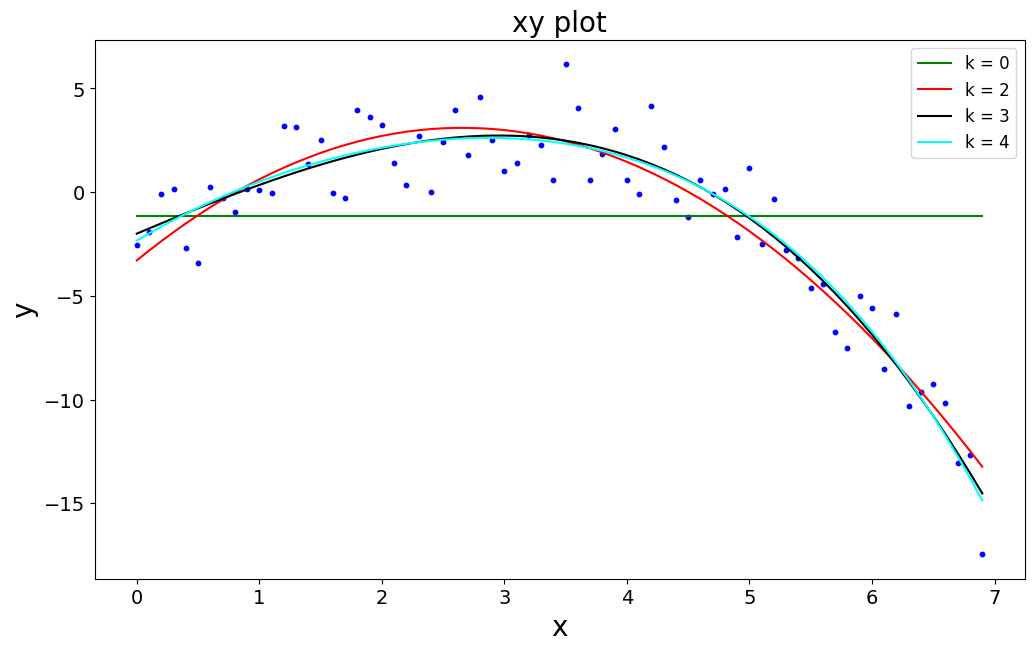

SSE_2 =  172.18  	 MSE_2 =  2.46
R^2 for the quadratic model =  0.8876
SSE_3 =  152.41  	 MSE_3 =  2.18
R^2 for the cubic model =  0.9005
SSE_4 =  151.23  	 MSE_4 =  2.16
R^2 for the quartic model =  0.9013


In [15]:
#Your code here

fit_2 = polyreg(xy_data, 2)[1]
fit_3 = polyreg(xy_data, 3)[1]
fit_4 = polyreg(xy_data, 4)[1]

fit_0 = polyreg(xy_data, 0)[1]
SSE_0 = np.linalg.norm(y - fit_0)**2

plt.rcParams['figure.figsize'] = [12, 7]
plt.scatter(x, y, s=10, color ='blue')   # s can be used to adjust the size of the dots
plt.plot(x, fit_0, color = 'green', label = 'k = 0')
plt.plot(x, fit_2, color = 'red', label = 'k = 2')
plt.plot(x, fit_3, color = 'black', label = 'k = 3')
plt.plot(x, fit_4, color = 'cyan', label = 'k = 4')
plt.xlabel('x')
plt.ylabel('y')
plt.title('xy plot')
#plt.savefig('xyplot.pdf', bbox = 'tight')
plt.legend(fontsize = 'large')
plt.show()

#We now compute the sum of squared errors and the MSE
SSE_2 = np.linalg.norm(y - fit_2)**2
MSE_2 = SSE_2/(np.size(y))
R2 = np.round(1- SSE_2/SSE_0, decimals = 4)

SSE_3 = np.linalg.norm(y - fit_3)**2
MSE_3 = SSE_3/(np.size(y))
R3 = np.round(1- SSE_3/SSE_0, decimals = 4)

SSE_4 = np.linalg.norm(y - fit_4)**2
MSE_4 = SSE_4/(np.size(y))
R4 = np.round(1- SSE_4/SSE_0, decimals = 4)

print('SSE_2 = ', np.round_(SSE_2, 2), ' \t MSE_2 = ', np.round_(MSE_2, 2))
print('R^2 for the quadratic model = ', R2)

print('SSE_3 = ', np.round_(SSE_3, 2), ' \t MSE_3 = ', np.round_(MSE_3, 2) )
print('R^2 for the cubic model = ', R3)

print('SSE_4 = ', np.round_(SSE_4, 2), ' \t MSE_4 = ', np.round_(MSE_4, 2) )
print('R^2 for the quartic model = ', R4)


 #### State which model you choose and briefly justify your choice.
 
 
 < fill in your answer in this cell.>

The fourth order model best describes the xy_data because it has the lowest MSE, which is the weighted mean of the error between the model and the actual data and thus has the highest R^2, which measures the strength of relationship between the model and actual data.
 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

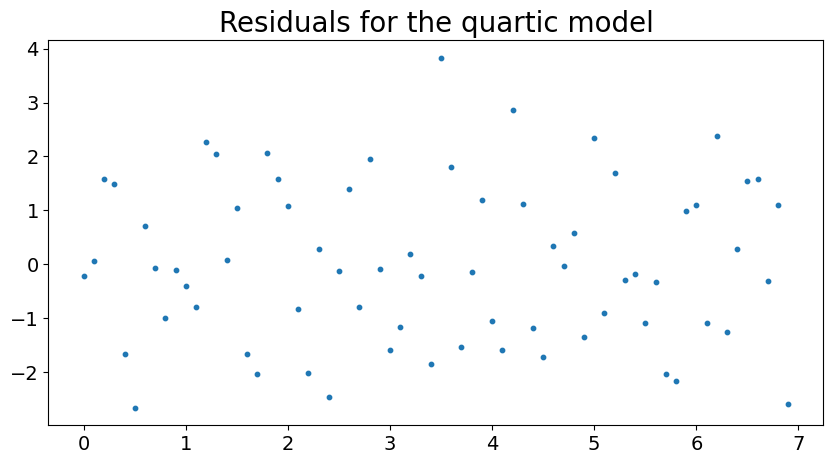

Mean of residuals for quadratic model =  0.0 Variance of residuals =  2.16


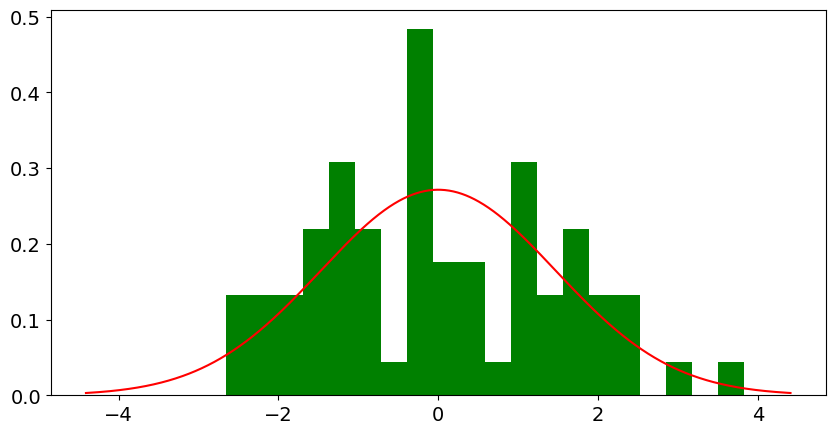

In [16]:
#Your code here
resid_best = polyreg(xy_data, 4)[2]
plt.rcParams['figure.figsize'] = [10, 5]
plt.scatter(x, resid_best, s=10)
plt.title('Residuals for the quartic model')
plt.savefig('resid_best.png', bbox_inches = 'tight')
plt.show()

print('Mean of residuals for quadratic model = ', np.round(np.mean(resid_best), 3), 
      'Variance of residuals = ', np.round(np.var(resid_best),3)) 

# Plot normed histogram of the residuals
n, bins, patches = plt.hist(resid_best, bins=20, density=True, facecolor='green');

# Plot Gaussian pdf with same mean and variance as the residuals
from scipy.stats import norm
res_best_stdev = np.std(resid_best)  #standard deviation of residuals
xvals = np.linspace(-3*res_best_stdev,3*res_best_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_best_stdev), 'r')
plt.show()
